In [1]:
#Run the initial EDA from the first lab for the project. 
#NOTE: We've commented out the graphs and analysis portions from the EDA just to make things run faster, hence the "Skinny"
#version of the filename
%run ./JB_AR_BC_SO_Project_3.ipynb

Initial Shape:  (2974335, 49)
Deduplication Shape:  (2974335, 49)
No Duplicate Data Found


<Figure size 1200x1800 with 1 Axes>

['MapQuest' 'MapQuest-Bing' 'Bing']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'W' 'NNW' 'NNE' 'S' 'N' 'VAR' 'SE'
 'SSE' 'ESE' 'E' 'NE' 'ENE' nan 'CALM']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974313 entries, 0 to 2974334
Data columns (total 62 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 float64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State              


(298058, 50)
ID                                     object
Severity                              float64
Start_Time                     datetime64[ns]
End_Time                       datetime64[ns]
Start_Lat                             float64
Start_Lng                             float64
Distance(mi)                          float64
Side                                   object
City                                   object
County                                 object
Zipcode                                object
Country                                object
Timezone                               object
Airport_Code                           object
Temperature(F)                        float64
Wind_Chill(F)                         float64
Humidity(%)                           float64
Pressure(in)                          float64
Visibility(mi)                        float64
Wind_Direction                         object
Wind_Speed(mph)                       float64
Precipitation(in)   

In [26]:
#Get table listing of missing values
checkMissingValues(df,0.00)

,columns_name,missing_count,missing_ratio


In [2]:
df_ungroupedSev.shape

(290989, 67)

In [3]:
df_groupedSev.shape

(290989, 67)

In [5]:
#Take an initial pass at the features we want to run through logistic regression
#featuresList = ['Severity','Start_Lat','Start_Lng','Distance(mi)','Side','Temperature(F)','Wind_Chill(F)',
 #               'Humidity(%)','Pressure(in)','Visibility(mi)','Precipitation(in)',
  #              'PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
   #             'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset',
    #            'Start_Month','Start_Hour','Start_Weekday','Time_Duration(min)',
     #           'Weather_Condition_Collapsed']

featuresList = ['Start_Lat','Start_Lng','Side','Temperature(F)',
                'Humidity(%)','Visibility(mi)','Precipitation(in)',
                'PointOfInterest','Bump','Crossing','Yield','Junction','No_Exit','Railway',
                'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']



#filter down the dataframe to just the features needed. We'll create a new dataframe just to be safe
df2 = df[featuresList]

In [6]:
# transform categories into dummy numerics
#cols_to_transform = ['Side','Sunrise_Sunset','Start_Weekday','Start_Month','Weather_Condition_Collapsed']
cols_to_transform = ['Side','Sunrise_Sunset']

df2 = pd.get_dummies(df2, columns = cols_to_transform)

#check to make sure everything transformed
df2.dtypes

Start_Lat               float64
Start_Lng               float64
Temperature(F)          float64
Humidity(%)             float64
Visibility(mi)          float64
Precipitation(in)       float64
PointOfInterest         float64
Bump                    float64
Crossing                float64
Yield                   float64
Junction                float64
No_Exit                 float64
Railway                 float64
Roundabout              float64
Station                 float64
Stop                    float64
Traffic_Calming         float64
Traffic_Signal          float64
Turning_Loop            float64
Side_L                    uint8
Side_R                    uint8
Sunrise_Sunset_Day        uint8
Sunrise_Sunset_Night      uint8
dtype: object

In [14]:
#df2_reduce =  df2.head(80000)
df2_reduce =  df2.copy()

**K Means Clustering**

**Initial package load up**

In [84]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.image import imread
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

**In this step, we apply standard scaling to our data for use in identifying the optimal number of clusters as a target for our clustering approaches.**

In [65]:
# Apply scaling to the data for DBScan

ss = StandardScaler()
X = ss.fit_transform(df3)

**Here we will visualize the entire dataset to look at the original shape**

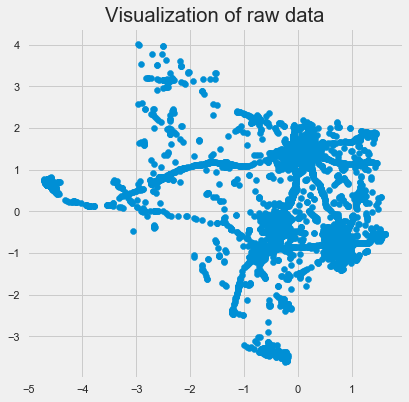

In [66]:
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')


# Plot the data
plt.figure(figsize=(6, 6))
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.scatter(X[:, 1], X[:,0])
plt.title('Visualization of raw data');

*Since we are using accident data for Texas you can see in the visualization above that most of the data is around major cities and highways.*

**Looking at just 2 clusters to see what the distribution of data looks like**

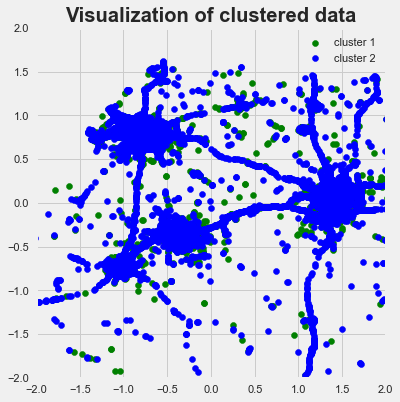

In [89]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X)
y_pred = kmeans.predict(X)
pred_labels = kmeans.labels_


# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[pred_labels == 0, 0], X[pred_labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X[pred_labels == 1, 0], X[pred_labels == 1, 1],
            c='blue', label='cluster 2')

plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

*Again similar to the raw data visualization above this one with just 2 clusters shows that majority of the data falls in cluster 1 because of population density and number of cars on the road, however there are some with cluster 2 but they are not as close together as cluster 1, We will do further analysis below to look into more clusters*

**Now we will leverage the elbow method plot to identify the optimal number of clusters for this dataset.**


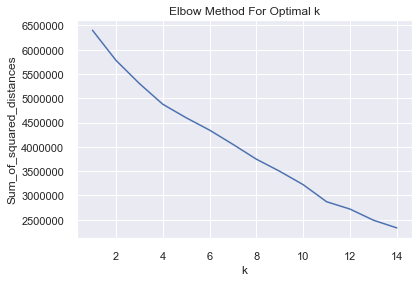

In [30]:
# Create elbow plot for sanity check on number of clusters

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
# Plot the appropriate k cluster size

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

*Based on the output of the plot, the optimal number of clusters appears to be around 7 or 8.  Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.  We will use 8 moving forward for the K Means Clustering*

Number of clusters: 8


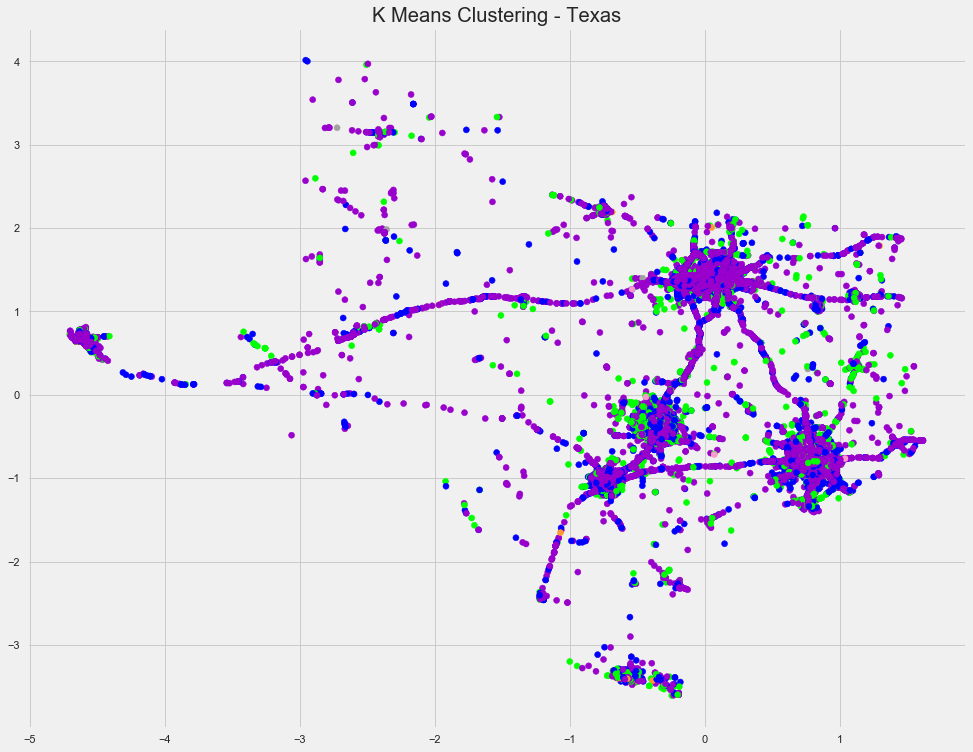

In [98]:
# KMeans Clustering with 8 clusters

df3 = df2_reduce.copy()
kmeans = KMeans(n_clusters=8, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X)
y_pred = kmeans.predict(X)
pred_labels = kmeans.labels_

colors = ['#9900cc', '#0000ff', '#00ff00', '#ff9933', '#ff0000', '#ff99cc', '#663300', '#A0A0A0','royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.figure(figsize=(15,12))
plt.scatter(X[:, 1], X[:,0],
            c=vectorizer(pred_labels))
plt.title("K Means Clustering - Texas")

kmeans_labels = kmeans.labels_
num_clusters = len(set(kmeans_labels))
print('Number of clusters: %d' % num_clusters)

samples_w_lbls = np.concatenate((X,pred_labels[:,np.newaxis]),axis=1)
filter = np.asarray([5])
res = samples_w_lbls[np.in1d(samples_w_lbls[:,-1], filter)]



In [101]:
# Append clusters back to dataset
df3["cluster"] = pred_labels

# Check clusters

cluster0_cnt = len(df3[pred_labels == 0])
cluster1_cnt = len(df3[pred_labels == 1])
cluster2_cnt = len(df3[pred_labels == 2])
cluster3_cnt = len(df3[pred_labels == 3])
cluster4_cnt = len(df3[pred_labels == 4])
cluster5_cnt = len(df3[pred_labels == 5])
cluster6_cnt = len(df3[pred_labels == 6])
cluster7_cnt = len(df3[pred_labels == 7])
#cluster8_cnt = len(df3[pred_labels == 8])
cluster0_per = round(len(df3[pred_labels == 0])/len(df3),2)
cluster1_per = round(len(df3[pred_labels == 1])/len(df3),2)
cluster2_per = round(len(df3[pred_labels == 2])/len(df3),2)
cluster3_per = round(len(df3[pred_labels == 3])/len(df3),2)
cluster4_per = round(len(df3[pred_labels == 4])/len(df3),2)
cluster5_per = round(len(df3[pred_labels == 5])/len(df3),2)
cluster6_per = round(len(df3[pred_labels == 6])/len(df3),2)
cluster7_per = round(len(df3[pred_labels == 7])/len(df3),2)
clusterAll_per = (round(cluster0_per + cluster1_per + cluster2_per + cluster3_per + cluster4_per + cluster5_per + cluster6_per + cluster7_per )) * 100
    
clusterAll_cnt = cluster0_cnt + cluster1_cnt + cluster2_cnt + cluster3_cnt + cluster4_cnt + cluster5_cnt + cluster6_cnt + cluster7_cnt

print("Cluster 0:", cluster0_cnt, "rows, ", cluster0_per, "percent of total")
print("Cluster 1:", cluster1_cnt, "rows, ", cluster1_per, "percent of total")
print("Cluster 2:", cluster2_cnt, "rows, ", cluster2_per, "percent of total")
print("Cluster 3:", cluster3_cnt, "rows, ", cluster3_per, "percent of total")
print("Cluster 4:", cluster4_cnt, "rows, ", cluster4_per, "percent of total")
print("Cluster 5:", cluster5_cnt, "rows, ", cluster5_per, "percent of total")
print("Cluster 6:", cluster6_cnt, "rows, ", cluster6_per, "percent of total")
print("Cluster 7:", cluster7_cnt, "rows, ", cluster7_per, "percent of total")


print("Total check", clusterAll_cnt, "rows,", clusterAll_per, "percent of total")

Cluster 0: 166954 rows,  0.57 percent of total
Cluster 1: 62770 rows,  0.22 percent of total
Cluster 2: 48270 rows,  0.17 percent of total
Cluster 3: 2692 rows,  0.01 percent of total
Cluster 4: 52 rows,  0.0 percent of total
Cluster 5: 1642 rows,  0.01 percent of total
Cluster 6: 4399 rows,  0.02 percent of total
Cluster 7: 4210 rows,  0.01 percent of total
Total check 290989 rows, 100 percent of total


In [102]:
# Create DBScan cluster dataframes
cluster0 = df3[pred_labels == 0]
cluster1 = df3[pred_labels == 1]
cluster2 = df3[pred_labels == 2]
cluster3 = df3[pred_labels == 3]
cluster4 = df3[pred_labels == 4]
cluster5 = df3[pred_labels == 5]
cluster6 = df3[pred_labels == 6]
cluster7 = df3[pred_labels == 7]

Text(0.5, 1.0, 'Cluster Group 7')

<Figure size 432x288 with 0 Axes>

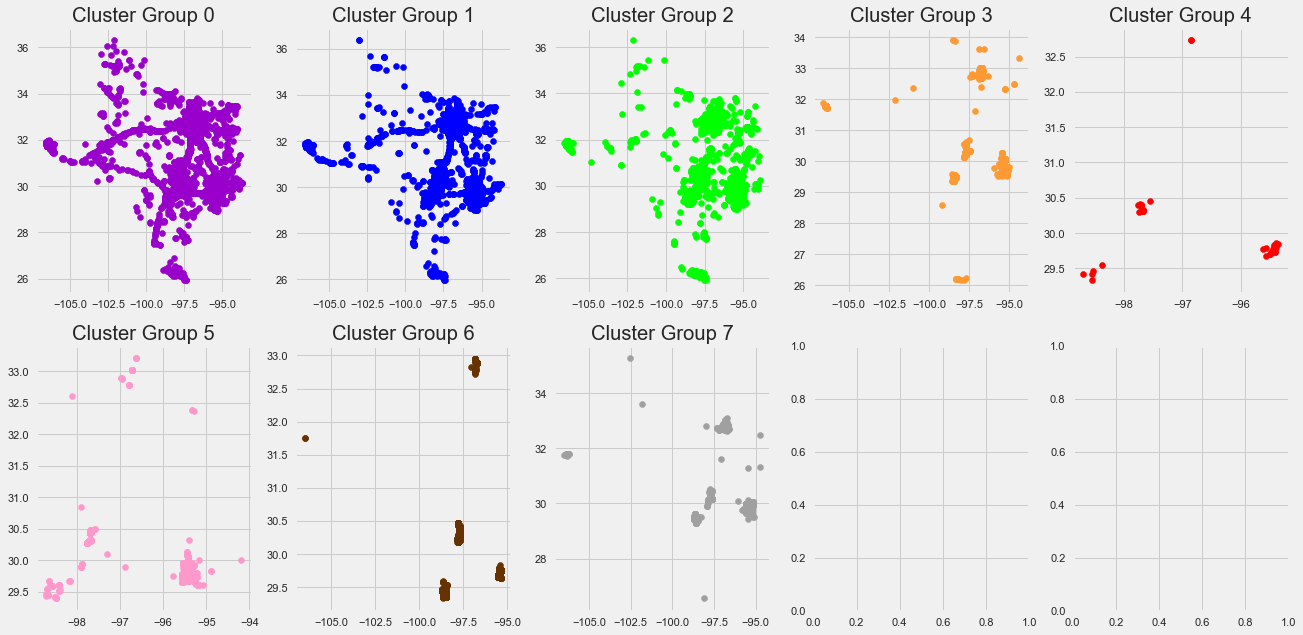

In [104]:
# Create individual DBScan cluster plots
fig = plt.figure()    
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

# row 1
axes[0,0].scatter(cluster0.iloc[:, 1], cluster0.iloc[:,0], c='#9900cc')
axes[0,0].set_title("Cluster Group 0")

axes[0,1].scatter(cluster1.iloc[:, 1], cluster1.iloc[:,0], c='#0000ff')
axes[0,1].set_title("Cluster Group 1")

axes[0,2].scatter(cluster2.iloc[:, 1], cluster2.iloc[:,0], c='#00ff00')
axes[0,2].set_title("Cluster Group 2")

axes[0,3].scatter(cluster3.iloc[:, 1], cluster3.iloc[:,0], c='#ff9933')
axes[0,3].set_title("Cluster Group 3")

axes[0,4].scatter(cluster4.iloc[:, 1], cluster4.iloc[:,0], c='#ff0000')
axes[0,4].set_title("Cluster Group 4")

# row 2
axes[1,0].scatter(cluster5.iloc[:, 1], cluster5.iloc[:,0], c='#ff99cc')
axes[1,0].set_title("Cluster Group 5")

axes[1,1].scatter(cluster6.iloc[:, 1], cluster6.iloc[:,0], c='#663300')
axes[1,1].set_title("Cluster Group 6")

axes[1,2].scatter(cluster7.iloc[:, 1], cluster7.iloc[:,0], c='#A0A0A0')
axes[1,2].set_title("Cluster Group 7")

**Results**

K Means Clustering created 8 clusterings of Texas accidents.We found 3 meaningful classifications based on those clusters:
    
*Cluster Group 0 and 1* - Highway Accidents and Suburban Accidents

*Cluster Group 2* - Urban Accidents

*Cluster Group 3,4,5,6,7* - Rural Accidents.

**Group Explanation**

*Cluster Group 0 and 1* - Highway Accidents and Suburban Accidents

The clustering data shows that 57% of the accidents are clustered into Group 0 and 22% of the accidents are clustered into Group 1. We can categorize this cluster as follows:

Occur along major highways and suburban areas with high population density.
Higher average severity.
Does not occur near traffic signals or crossings, but does occur near junctions.

Thus we can conclude that these are Highway Accidents and in busy suburban areas, occuring on the highway and busy roads or where junctions occur. These are marginally more severe than other accidents.


*Clustering Groups 2* - Urban Accidents

Groups 2 account for 17% of accidents. We can categorize this cluster group as follows:

Occur in downtown and urban areas
High frequency of nearby crossings and traffic signals
We can classify these as Urban Accidents due to their locations and road characteristics.


*Cluster Groups 3,4,5,6,7* - Rural Accidents

This group is very small compared to the others and only accounting for <1% of Texas accidents. These clusters may not be meaningful, but we can see that most of these are not in major metro areas or along highways so these are just normal accidents happening in small rural cities in Texas.


